y  b0 + b1 + x

est es una ecuación de regresión simple

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('datasets/nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [5]:
vars=['BPXSY1', 'RIDAGEYR','RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI','SMQ020']

In [6]:
vars

['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI', 'SMQ020']

In [7]:
df=df[vars].dropna()
df

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2
...,...,...,...,...,...,...,...
5730,112.0,76,2,3,3.0,21.5,1
5731,118.0,26,1,3,5.0,33.8,2
5732,154.0,80,2,3,4.0,31.0,1
5733,104.0,35,1,3,1.0,26.0,1


In [12]:
import statsmodels.api as sm
model = sm.OLS.from_formula('BPXSY1~RIDAGEYR', #Y= b0 + b1 *X
                          data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          2.09e-259
Time:                        12:31:39   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df.BPXSY1.std()

18.486559500782416

In [14]:
cc = df [['BPXSY1','RIDAGEYR']].corr()
cc

,BPXSY1,RIDAGEYR
BPXSY1,1.000000,0.455142
RIDAGEYR,0.455142,1.000000


In [15]:
model = sm.OLS.from_formula('BPXSY1~RIDAGEYR + BMXBMI + RIAGENDR', #BPXSY1 = b0 +b1RIDAGEYR+ + b2BMXBMI + b3RIAGENDR
                           data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          8.54e-286
Time:                        12:42:49   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.7405      1.323     74.618      0.000      96.146     101.335
RIDAGEYR       0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI         0.3060      0.033      9.351      0.000       0.242       0.370
RIAGENDR      -3.5783      0.457     -7.833      0.000      -4.474      -2.683
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         353.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

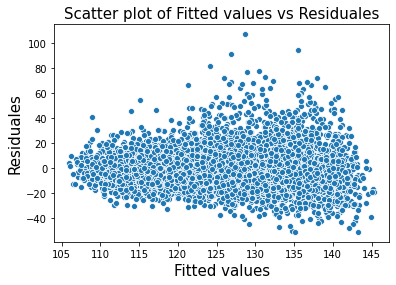

In [18]:
pp = sns.scatterplot(x = result.fittedvalues,
                    y = result.resid)
pp.set_xlabel('Fitted values',
             size=15)
pp.set_ylabel('Residuales',
              size=15)
pp.set_title('Scatter plot of Fitted values vs Residuales',
             size=15)
plt.show()

#La línea recta son los valores ajustados, los residuos son los valores que no se ajustan a la línea que la rodean

In [19]:
result.resid

0       -4.863488
1       16.456754
2       -2.703837
3        1.073263
4      -17.572602
          ...    
5730   -21.950337
5731     0.253192
5732    15.259520
5733   -15.598480
5734     8.567047
Length: 5102, dtype: float64

In [21]:
result.fittedvalues

0       132.863488
1       129.543246
2       140.703837
3       130.926737
4       117.572602
           ...    
5730    133.950337
5731    117.746808
5732    138.740480
5733    119.598480
5734    109.432953
Length: 5102, dtype: float64